In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd drive/MyDrive/BEST/ios_clf_direction

/content/drive/MyDrive/BEST/ios_clf_direction


In [ ]:
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.9.1


In [ ]:
data_for_5 = [] 
data_for_7 = []
data_for_4 = []

data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

for data in data_name:
  for index in data[1]: 
    if index < 10:
      beacon_5 = pd.DataFrame(pd.read_csv(f'ios_clf_data_5_concated{data[0]}0{index}.csv'))
      beacon_7 = pd.DataFrame(pd.read_csv(f'ios_clf_data_7_concated{data[0]}0{index}.csv'))
      beacon_4 = pd.DataFrame(pd.read_csv(f'ios_clf_data_4_concated{data[0]}0{index}.csv'))
    else:
      beacon_5 = pd.DataFrame(pd.read_csv(f'ios_clf_data_5_concated{data[0]}{index}.csv'))
      beacon_7 = pd.DataFrame(pd.read_csv(f'ios_clf_data_7_concated{data[0]}{index}.csv'))
      beacon_4 = pd.DataFrame(pd.read_csv(f'ios_clf_data_4_concated{data[0]}{index}.csv'))
    data_for_5.append(beacon_5)
    data_for_7.append(beacon_7)
    data_for_4.append(beacon_4)


In [ ]:
result_5 = pd.concat(data_for_5)
result_7 = pd.concat(data_for_7)
result_4 = pd.concat(data_for_4)

In [ ]:
result_5.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
result_4.drop('Unnamed: 0', axis=1, inplace=True)
result_7.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
result_4.loc[result_4['location'] == 'A011', 'location'] = 'A11'
result_4.loc[result_4['location'] == 'A010', 'location'] = 'A10'
result_5.loc[result_5['location'] == 'A011', 'location'] = 'A11'
result_5.loc[result_5['location'] == 'A010', 'location'] = 'A10'
result_7.loc[result_7['location'] == 'A011', 'location'] = 'A11'
result_7.loc[result_7['location'] == 'A010', 'location'] = 'A10'

In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

# result['location'] = ohe.fit_transform(result['location'])

X_5 = np.array(result_5.iloc[:, 1:])
y_5 = le.fit_transform(np.array(result_5['location']).reshape(-1, 1))
y_5 = to_categorical(y_5)

X_7 = np.array(result_7.iloc[:, 1:])
y_7 = le.fit_transform(np.array(result_7['location']).reshape(-1, 1))
y_7 = to_categorical(y_7)

X_4 = np.array(result_4.iloc[:, 1:])
y_4 = le.fit_transform(np.array(result_4['location']).reshape(-1, 1))
y_4 = to_categorical(y_4)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd_5, test_ds_pd_5 = split_dataset(result_5)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd_5), len(test_ds_pd_5)))


train_ds_pd_7, test_ds_pd_7 = split_dataset(result_7)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd_7), len(test_ds_pd_7)))


train_ds_pd_4, test_ds_pd_4 = split_dataset(result_4)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd_4), len(test_ds_pd_4)))

21475 examples in training, 9331 examples for testing.
21608 examples in training, 9198 examples for testing.
21564 examples in training, 9242 examples for testing.


In [ ]:
# Install TensorFlow Dececision Forests
# !pip install tensorflow_decision_forests

In [ ]:
import tensorflow_decision_forests as tfdf

In [ ]:
train_ds_5 = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd_5, label='location')
test_ds_5 = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd_5, label='location')

train_ds_7 = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd_5, label='location')
test_ds_7 = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd_5, label='location')

train_ds_4 = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd_4, label='location')
test_ds_4 = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd_4, label='location')

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [ ]:
beacon7_randomForest_model_1 = tfdf.keras.RandomForestModel()
beacon7_randomForest_model_1.compile(metrics=['accuracy'])
with sys_pipes():
  beacon7_randomForest_model_1.fit(x=train_ds_7)

Use /tmp/tmpn_1ichrg as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.853722. Found 21475 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpn_1ichrg/model/ with prefix abcfdff281524bf6
[INFO abstract_model.cc:1248] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model trained in 0:00:42.614849
Compiling model...
Model compiled.


In [ ]:
beacon7_randomForest_model_1_evaluation = beacon7_randomForest_model_1.evaluate(test_ds_7, return_dict = True)
print()

for name, value in beacon7_randomForest_model_1_evaluation.items():
  print(f"{name}: {value:.4f}")

10/10 [==============================] - 1s 52ms/step - loss: 0.0000e+00 - accuracy: 0.9892

loss: 0.0000
accuracy: 0.9892


In [ ]:
tuner = tfdf.tuner.RandomSearch(num_trials=20)

# Hyper-parameters to optimize.
tuner.choice("max_depth", [4, 5, 6, 7])

beacon7_randomForest_model_2 = tfdf.keras.RandomForestModel(tuner=tuner)
beacon7_randomForest_model_2.fit(train_ds_7)

Use /tmp/tmpyevg007q as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.811367. Found 21475 examples.
Training model...
Model trained in 0:01:10.338157
Compiling model...
Model compiled.


In [ ]:
randomForest_model_2_evaluation = beacon7_randomForest_model_2.evaluate(test_ds_7, return_dict = True)
print()

for name, value in randomForest_model_2_evaluation.items():
  print(f"{name}: {value:.4f}")

10/10 [==============================] - 1s 39ms/step - loss: 0.0000e+00

loss: 0.0000


In [ ]:
beacon4_randomForest_model_2 = tfdf.keras.RandomForestModel(tuner=tuner)
beacon4_randomForest_model_2.fit(train_ds_4)

Use /tmp/tmpa57vx54j as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.869707. Found 21564 examples.
Training model...
Model trained in 0:01:02.243206
Compiling model...
Model compiled.


In [ ]:
beacon5_randomForest_model_2 = tfdf.keras.RandomForestModel(tuner=tuner)
beacon5_randomForest_model_2.fit(train_ds_5)

Use /tmp/tmpw06w2i9s as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.765211. Found 21475 examples.
Training model...
Model trained in 0:01:10.251153
Compiling model...
Model compiled.


In [ ]:
beacon4_randomForest_model_2_evaluation = beacon4_randomForest_model_2.evaluate(test_ds_7, return_dict = True)

for name, value in beacon4_randomForest_model_2_evaluation.items():
  print(f"{name}: {value:.4f}")

10/10 [==============================] - 1s 39ms/step - loss: 0.0000e+00
loss: 0.0000


In [ ]:
randomForest_model_maxdepth4 = tfdf.keras.RandomForestModel(max_depth=4)
randomForest_model_maxdepth5 = tfdf.keras.RandomForestModel(max_depth=5)
randomForest_model_maxdepth6 = tfdf.keras.RandomForestModel(max_depth=6)
randomForest_model_maxdepth7 = tfdf.keras.RandomForestModel(max_depth=7)

Use /tmp/tmphx27c3id as temporary training directory
Use /tmp/tmpvkvzpq1h as temporary training directory
Use /tmp/tmpymhu7s4f as temporary training directory
Use /tmp/tmpzow0yz1t as temporary training directory


# RandomForest
## max_depth: 4,5,6,7 를 사용해서 각각의 모델을 평가한다.

## RandomForest
- max_depth : 4
- data: 상위비콘 4개를 제외한 나머지 비콘을 -200

In [ ]:
randomForest_model_maxdepth4.fit(train_ds_4)
beacon4_randomForest_model_maxdepth4_evaluation = randomForest_model_maxdepth4.evaluate(test_ds_4, return_dict = True)

for name, value in beacon4_randomForest_model_maxdepth4_evaluation.items():
  print(f"{name}: {value:.4f}")

Reading training dataset...
Training dataset read in 0:00:01.321912. Found 21564 examples.
Training model...
Model trained in 0:00:10.012226
Compiling model...
Model compiled.
10/10 [==============================] - 0s 36ms/step - loss: 0.0000e+00
loss: 0.0000


## RandomForest
- max_depth : 5
- data: 상위비콘 4개를 제외한 나머지 비콘을 -200

In [ ]:
randomForest_model_maxdepth5.fit(train_ds_4)
beacon4_randomForest_model_maxdepth5_evaluation = randomForest_model_maxdepth4.evaluate(test_ds_4, return_dict = True)

for name, value in beacon4_randomForest_model_maxdepth5_evaluation.items():
  print(f"{name}: {value:.4f}")

Reading training dataset...
Training dataset read in 0:00:00.823178. Found 21564 examples.
Training model...
Model trained in 0:00:13.363544
Compiling model...
Model compiled.
10/10 [==============================] - 0s 32ms/step - loss: 0.0000e+00
loss: 0.0000


## RandomForest
- max_depth : 6
- data: 상위비콘 4개를 제외한 나머지 비콘을 -200

In [ ]:
randomForest_model_maxdepth6.fit(train_ds_4)
beacon4_randomForest_model_maxdepth6_evaluation = randomForest_model_maxdepth4.evaluate(test_ds_4, return_dict = True)

for name, value in beacon4_randomForest_model_maxdepth6_evaluation.items():
  print(f"{name}: {value:.4f}")

Reading training dataset...
Training dataset read in 0:00:00.781014. Found 21564 examples.
Training model...
Model trained in 0:00:16.914351
Compiling model...
Model compiled.
10/10 [==============================] - 0s 28ms/step - loss: 0.0000e+00
loss: 0.0000


## RandomForest
- max_depth : 7
- data: 상위비콘 4개를 제외한 나머지 비콘을 -200

In [ ]:
randomForest_model_maxdepth7.fit(train_ds_4)
beacon4_randomForest_model_maxdepth7_evaluation = randomForest_model_maxdepth4.evaluate(test_ds_4, return_dict = True)

for name, value in beacon4_randomForest_model_maxdepth7_evaluation.items():
  print(f"{name}: {value:.4f}")

Reading training dataset...
Training dataset read in 0:00:00.810636. Found 21564 examples.
Training model...
Model trained in 0:00:20.293772
Compiling model...
Model compiled.
10/10 [==============================] - 0s 27ms/step - loss: 0.0000e+00
loss: 0.0000


## RandomForest
- max_depth : 4
- data: 상위비콘 5개를 제외한 나머지 비콘을 -200

In [ ]:
randomForest_model_maxdepth4.fit(train_ds_5)
beacon5_randomForest_model_maxdepth4_evaluation = randomForest_model_maxdepth4.evaluate(test_ds_5, return_dict = True)

for name, value in beacon5_randomForest_model_maxdepth4_evaluation.items():
  print(f"{name}: {value:.4f}")

Reading training dataset...
Training dataset read in 0:00:00.390344. Found 21475 examples.
Training model...
Model trained in 0:00:11.528643
Compiling model...
Model compiled.
10/10 [==============================] - 0s 34ms/step - loss: 0.0000e+00
loss: 0.0000


# GBM

In [ ]:
from keras import backend as K


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall

def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

### GBM Model 1
- 비콘 4개를 사용한 것
- 과적합을 방지하기 위해서 depth를 2로만 사용한다.
- 과적합을 방지하기 위해 subsample 0.7


In [ ]:
params = {
  'max_depth': 2,
  'subsample': 0.7,
  'num_trees': 33,
  'verbose': 1
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
}

GBM_model_1 = tfdf.keras.GradientBoostedTreesModel(**params)
GBM_model_1.compile(metrics=["accuracy", recall, f1score, precision])
GBM_model_1.fit(x=train_ds_4, validation_data=test_ds_4, verbose=1)
print(GBM_model_1.evaluate(train_ds_4, return_dict=True))
print(GBM_model_1.evaluate(test_ds_4, return_dict=True))

Use /tmp/tmpjag3ac6s as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.798442. Found 21564 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(9242, shape=(), dtype=int32)
Validation dataset read in 0:00:00.812945. Found 9242 examples.
Training model...
Model trained in 0:00:14.729705
Compiling model...
Model compiled.
22/22 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - accuracy: 0.9182 - recall: 0.9192 - f1score: 0.9358 - precision: 0.9664
{'loss': 0.0, 'accuracy': 0.918196976184845, 'recall': 0.9192426800727844, 'f1score': 0.9358183145523071, 'precision': 0.9663639068603516}
10/10 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - accuracy: 0.9120 - recall: 0.9211 - f1score: 0.9426 - precision: 0.9716
{'loss': 0.0, 'accuracy': 0.9120320081710815, 'recall': 0.9211241006851196, 'f1score': 0.9426368474960327, 'precision': 0.9715789556503296}


### GBM_model_2
- 비콘 5개를 사용

In [ ]:
params = {
  'max_depth': 2,
  'subsample': 0.7,
  'num_trees': 33,
  'verbose': 1
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
}

GBM_model_2 = tfdf.keras.GradientBoostedTreesModel(**params)
GBM_model_2.compile(metrics=["accuracy", recall, f1score, precision])
GBM_model_2.fit(x=train_ds_5, validation_data=test_ds_5)
print(GBM_model_2.evaluate(train_ds_5, return_dict=True))
print(GBM_model_2.evaluate(test_ds_5, return_dict=True))

Use /tmp/tmpag6tnzc3 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.747892. Found 21475 examples.
Reading validation dataset...


Num validation examples: tf.Tensor(9331, shape=(), dtype=int32)
Validation dataset read in 0:00:00.859113. Found 9331 examples.
Training model...
Model trained in 0:00:15.276143
Compiling model...
Model compiled.
22/22 [==============================] - 1s 26ms/step - loss: 0.0000e+00 - accuracy: 0.9211 - recall: 0.9225 - f1score: 0.9372 - precision: 0.9697
{'loss': 0.0, 'accuracy': 0.9211176037788391, 'recall': 0.9225315451622009, 'f1score': 0.9372376799583435, 'precision': 0.9696969389915466}
10/10 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - accuracy: 0.9189 - recall: 0.9308 - f1score: 0.9463 - precision: 0.9672
{'loss': 0.0, 'accuracy': 0.918872594833374, 'recall': 0.930810809135437, 'f1score': 0.9462624788284302, 'precision': 0.9672492742538452}


### GBM_Model_3
- 비콘 7개를 사용한다.

In [ ]:
params = {
  'max_depth': 2,
  'subsample': 0.7,
  'num_trees': 50,
  'verbose': 1
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
}

GBM_model_3 = tfdf.keras.GradientBoostedTreesModel(**params)
GBM_model_3.compile(metrics=["accuracy", recall, f1score, precision])
GBM_model_3.fit(x=train_ds_7, validation_data=test_ds_7)
print(GBM_model_3.evaluate(train_ds_7, return_dict=True))
print(GBM_model_3.evaluate(test_ds_7, return_dict=True))

Use /tmp/tmp114dr5hw as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.821732. Found 21475 examples.
Reading validation dataset...


Num validation examples: tf.Tensor(9331, shape=(), dtype=int32)
Validation dataset read in 0:00:00.679782. Found 9331 examples.
Training model...
Model trained in 0:00:23.262660
Compiling model...
Model compiled.
22/22 [==============================] - 1s 30ms/step - loss: 0.0000e+00 - accuracy: 0.9468 - recall: 0.9549 - f1score: 0.9544 - precision: 0.9698
{'loss': 0.0, 'accuracy': 0.9468218684196472, 'recall': 0.9548656344413757, 'f1score': 0.9543800354003906, 'precision': 0.9698347449302673}
10/10 [==============================] - 1s 32ms/step - loss: 0.0000e+00 - accuracy: 0.9431 - recall: 0.9565 - f1score: 0.9596 - precision: 0.9668
{'loss': 0.0, 'accuracy': 0.943092942237854, 'recall': 0.9565010070800781, 'f1score': 0.9596158862113953, 'precision': 0.9667536020278931}


In [ ]:
y_pred = GBM_model_3.predict(test_ds_7)

10/10 [==============================] - 0s 29ms/step


In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
true_categories = tf.concat([y for x, y in test_ds_7], axis=0)

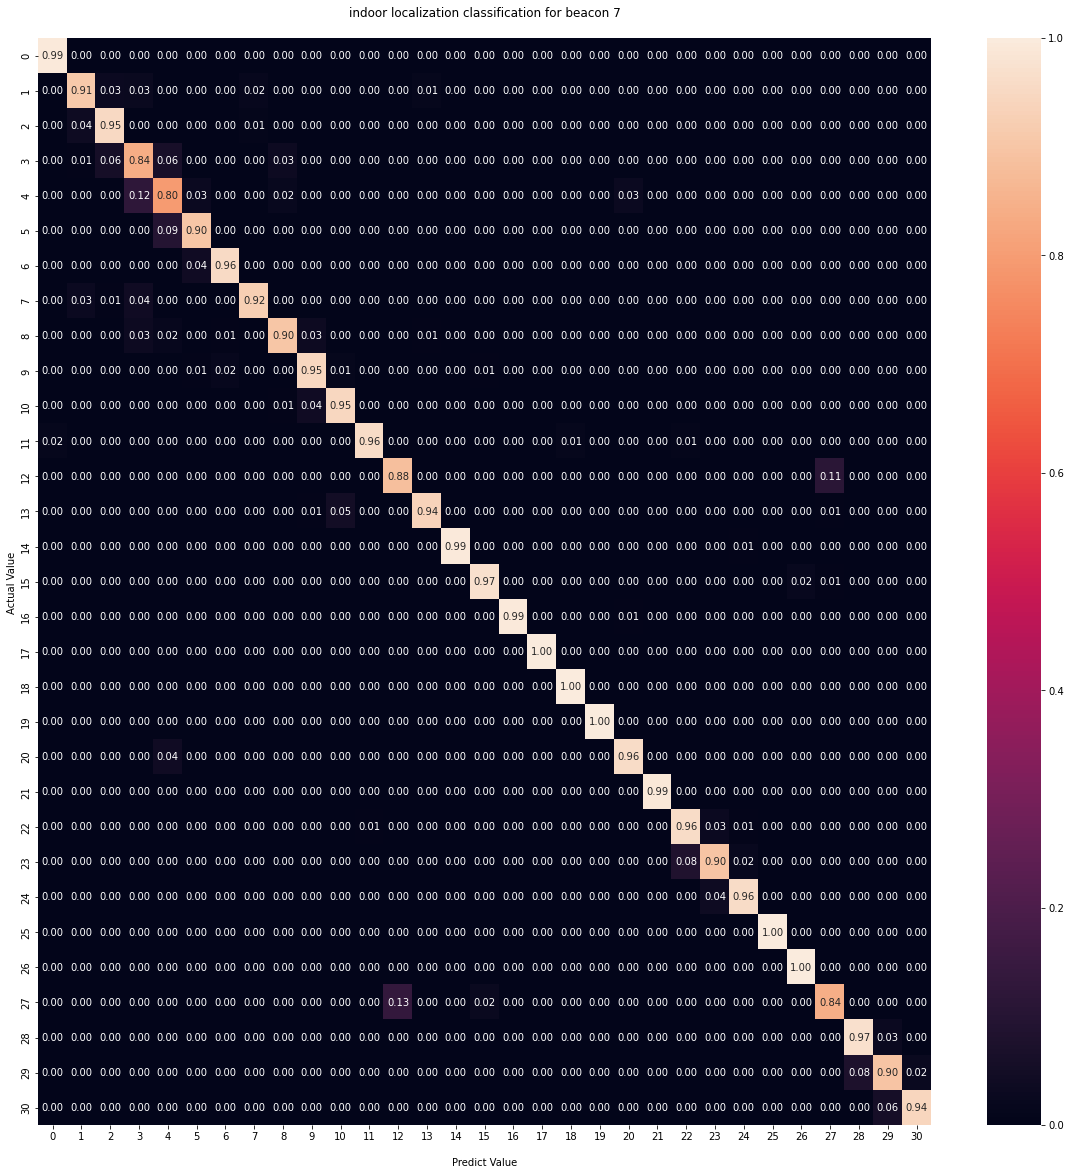

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_GBM_7 = confusion_matrix(predicted_categories, true_categories)
cmn = confusion_matrix_GBM_7.astype('float') / confusion_matrix_GBM_7.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(20, 20)) 

ax = sns.heatmap(cmn, annot = True, fmt=".2f")
ax.set_title('indoor localization classification for beacon 7\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

10/10 [==============================] - 0s 26ms/step


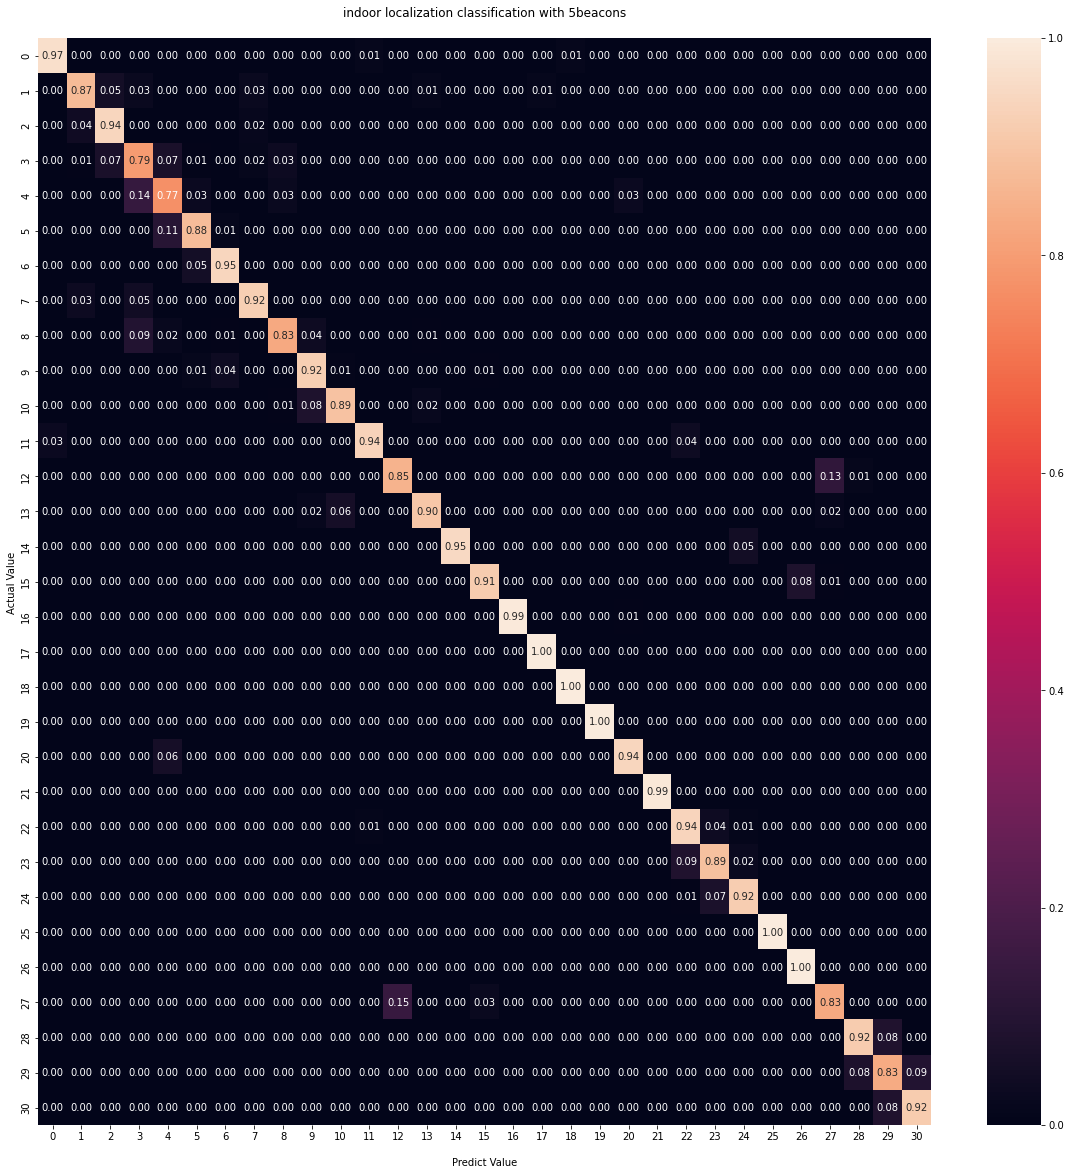

In [ ]:
from sklearn.metrics import confusion_matrix


y_pred = GBM_model_2.predict(test_ds_5)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_ds_5], axis=0)

confusion_matrix_GBM_5 = confusion_matrix(predicted_categories, true_categories)
cmn = confusion_matrix_GBM_5.astype('float') / confusion_matrix_GBM_5.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cmn, annot = True, fmt=".2f")
ax.set_title('indoor localization classification with 5beacons\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

10/10 [==============================] - 0s 26ms/step


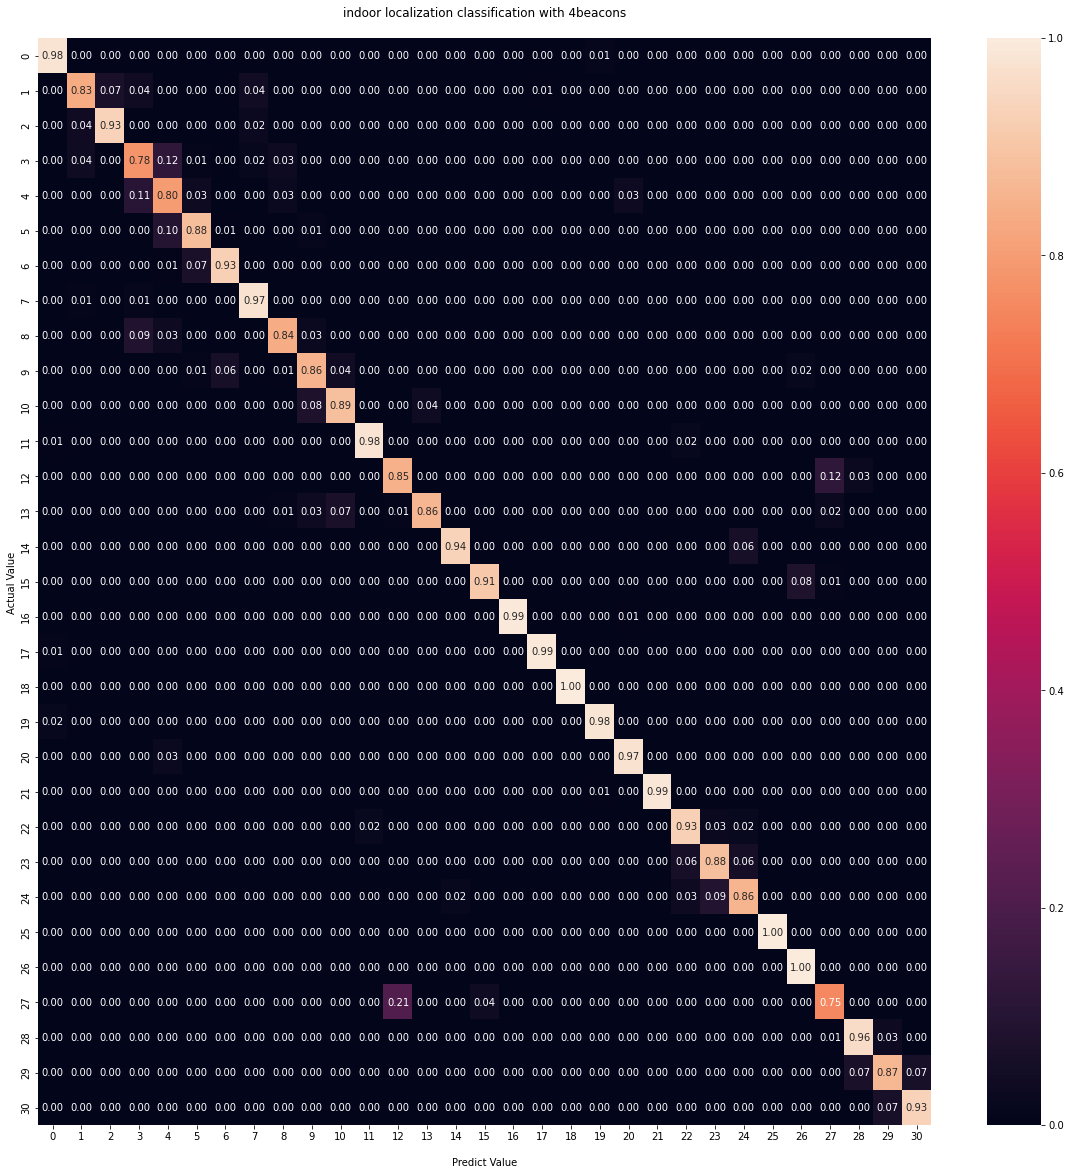

In [ ]:
from sklearn.metrics import confusion_matrix


y_pred = GBM_model_1.predict(test_ds_4)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_ds_4], axis=0)


confusion_matrix_GBM_5 = confusion_matrix(predicted_categories, true_categories)
cmn = confusion_matrix_GBM_5.astype('float') / confusion_matrix_GBM_5.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cmn, annot = True, fmt=".2f")
ax.set_title('indoor localization classification with 4beacons\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

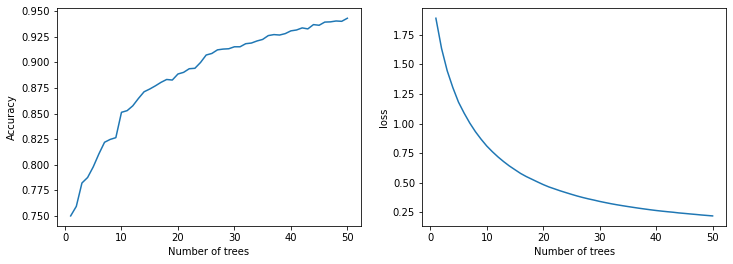

In [ ]:
import matplotlib.pyplot as plt

logs = GBM_model_3.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("loss")

plt.show()

<Figure size 432x288 with 0 Axes>

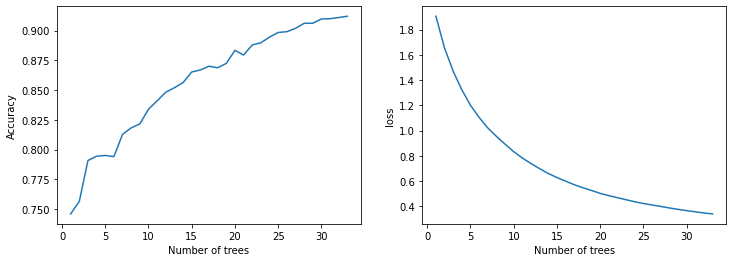

In [ ]:
plt.clf()

logs = GBM_model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("loss")

plt.show()

<Figure size 432x288 with 0 Axes>

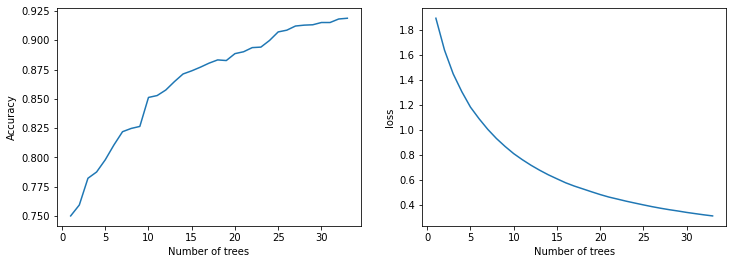

In [ ]:
plt.clf()

logs = GBM_model_2.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("loss")

plt.show()

In [ ]:
testdatas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

#Filtered_Test_U01

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/Filtered_Test_{data[0]}0{index}.csv'))
      no_supervised.drop('direction', axis=1, inplace=True)
      no_supervised.drop('timeStamp', axis=1, inplace=True)
      no_supervised.drop('heading', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}0{index}')
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/Filtered_Test_{data[0]}{index}.csv'))
      no_supervised.drop('direction', axis=1, inplace=True)
      no_supervised.drop('heading', axis=1, inplace=True)
      no_supervised.drop('timeStamp', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}{index}')
    testdatas.append(no_supervised)


def tominus200(x) :
  if float(x) <= -90 :
    return -200
  return float(x)

beacons = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021', '022']
for data in testdatas:
  for beacon in beacons:
    data[beacon] = data[beacon].apply(tominus200)

In [ ]:
for data in testdatas:
  for row_index in range(len(data)):
    if row_index % 2 == 1:
      for col_index in range(1, len(data.columns)):
        if data.iloc[row_index - 1, col_index] > data.iloc[row_index, col_index]:
          data.iloc[row_index, col_index] = data.iloc[row_index - 1, col_index]

In [ ]:
# 상위 4개를 통해서 classification 하기
for data in testdatas:
  for row_index in range(len(data)):
    column_idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
    a = sorted(data.loc[row_index].tolist()[1:])
    b = list(a)[-4:]
    isMax = [0]
    for i in range(len(data.columns)):
      for num in b:
        if data.loc[row_index][i] == num:
          isMax.append(i)

    remove_set = set(isMax)
    column_idx = [i for i in column_idx if i not in remove_set]
    data.iloc[[row_index], column_idx] = [-200 for i in range(len(column_idx))]

In [ ]:
for index in range(len(testdatas)):
  testdatas[index] = testdatas[index].iloc[1::2,:]
for index in range(len(testdatas)):
  testdatas[index].reset_index(inplace=True)
for index in range(len(testdatas)):
  testdatas[index].drop('index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
result_test = pd.concat(testdatas)

In [ ]:
result_test.reset_index(inplace=True)

In [ ]:
result_test.drop('index', axis=1, inplace=True)

In [ ]:
set(list(result_4['location']))

{'A01',
 'A02',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A09',
 'A10',
 'A11',
 'E01',
 'E02',
 'E03',
 'H01',
 'H02',
 'R01',
 'R02',
 'R03',
 'R04',
 'R05',
 'S01',
 'S02',
 'S03',
 'S04',
 'S05',
 'S06',
 'S07',
 'S08',
 'S09',
 'U01'}

In [ ]:
set(list(result_test['location']))

{'A01',
 'A02',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A09',
 'A10',
 'A11',
 'E01',
 'E02',
 'E03',
 'H01',
 'H02',
 'R01',
 'R02',
 'R03',
 'R04',
 'R05',
 'S01',
 'S02',
 'S03',
 'S04',
 'S05',
 'S06',
 'S07',
 'S08',
 'S09',
 'U01'}

In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result_test.iloc[:, 1:])
y = le.fit_transform(np.array(result_test['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
testdata_ds = tfdf.keras.pd_dataframe_to_tf_dataset(result_test, label='location')

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


3/3 [==============================] - 0s 30ms/step


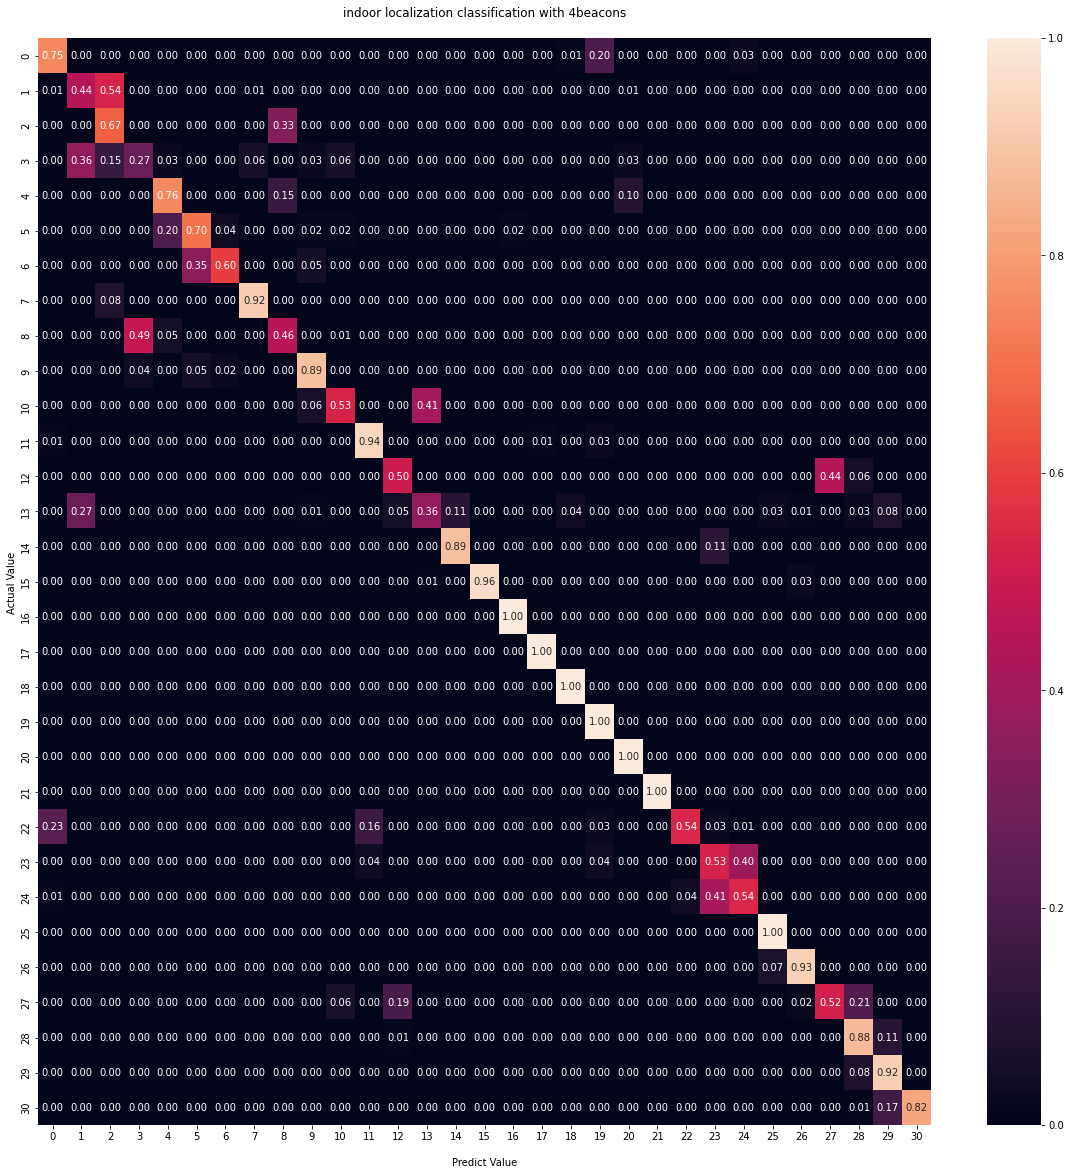

In [ ]:
from sklearn.metrics import confusion_matrix


y_pred = GBM_model_1.predict(testdata_ds)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in testdata_ds], axis=0)


confusion_matrix_GBM_5 = confusion_matrix(predicted_categories, true_categories)
cmn = confusion_matrix_GBM_5.astype('float') / confusion_matrix_GBM_5.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cmn, annot = True, fmt=".2f")
ax.set_title('indoor localization classification with 4beacons\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [ ]:
testdata_ds

<PrefetchDataset element_spec=({'001': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '002': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '003': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '004': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '005': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '006': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '007': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '008': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '009': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '010': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '011': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '012': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '013': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '014': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '015': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '016': TensorSpec(shape

In [ ]:
test_ds_4

<PrefetchDataset element_spec=({'001': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '002': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '003': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '004': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '005': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '006': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '007': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '008': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '009': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '010': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '011': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '012': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '013': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '014': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '015': TensorSpec(shape=(None,), dtype=tf.float64, name=None), '016': TensorSpec(shape

In [ ]:
print(GBM_model_1.evaluate(testdata_ds, return_dict=True))

3/3 [==============================] - 1s 73ms/step - loss: 0.0000e+00 - accuracy: 0.7330 - recall: 0.7956 - f1score: 0.8793 - precision: 0.9844
{'loss': 0.0, 'accuracy': 0.7329843044281006, 'recall': 0.7955827713012695, 'f1score': 0.879302978515625, 'precision': 0.9843546748161316}
